In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_pacf, plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
# load the dataset
df = pd.read_csv('/bitcoin_price.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [11]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

Time Series Index

In [12]:
# Convert "Date" to a datetime object
df['Date'] = pd.to_datetime(df['Date']
                            , format="%Y-%m-%d")

In [13]:
# Set "Date" as the index
df.set_index("Date", inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [15]:
# set the index when we import the data
df1 = pd.read_csv('/bitcoin_price.csv',
                  index_col='Date',
                  parse_dates=True)
df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [16]:
# resample the data to a different time granularity
df.resample("W").mean() # weekly - median, max

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-21,429.916998,437.718195,406.624402,416.859003,416.859003,3.138068e+07
2014-09-28,410.650718,418.668993,399.377141,407.692566,407.692566,2.668180e+07
2014-10-05,369.774288,376.721000,353.207140,361.426570,361.426570,3.952256e+07
2014-10-12,346.927429,363.308864,337.567858,355.234580,355.234580,4.873611e+07
2014-10-19,389.010284,397.790427,380.410575,390.479854,390.479854,2.241458e+07
...,...,...,...,...,...,...
2023-12-03,38038.414062,38743.479353,37766.444196,38399.994978,38399.994978,1.919430e+10
2023-12-10,43002.227121,44027.167411,42586.383929,43538.877232,43538.877232,2.692909e+10
2023-12-17,42369.368862,42969.940848,41148.103237,42020.472656,42020.472656,2.407050e+10


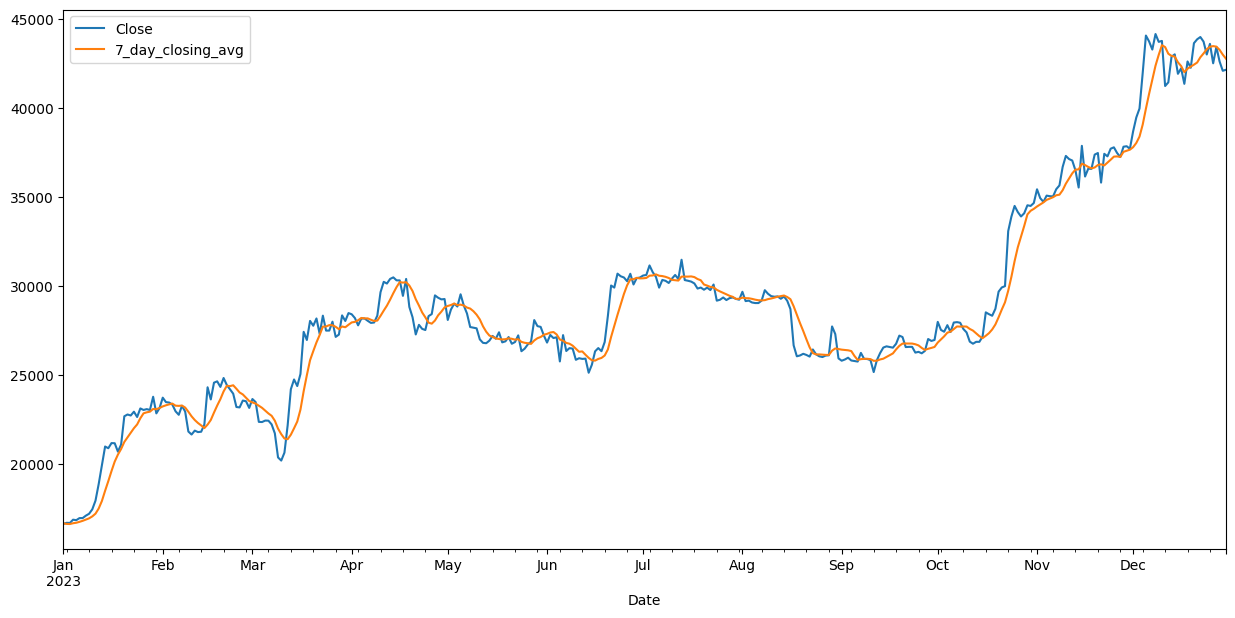

In [17]:
# Generate a 7-day rolling average for the Closing Price
df['7_day_closing_avg'] = df['Close'].rolling(window = 7).mean()
# plot the Close price and the 7 day rolling average
df[['Close', '7_day_closing_avg']].loc['2023'].plot(figsize=(15, 7))
plt.show()

In [ ]:
# Find the month with the highest closing average
df.resample('ME').mean()['Close'].idxmax() # ME for month

In [18]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,7_day_closing_avg
Date,,,,,,,
2023-12-26,43599.847656,43603.175781,41676.488281,42520.402344,42520.402344,30026850982,43486.929688
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032,43457.016183
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014,43279.688058
2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055,43008.473772
2023-12-30,42091.753906,42584.125000,41556.226562,42156.902344,42156.902344,16013925945,42782.382254


In [19]:
# Compute the percentage change for the close variable
df['daily_return_100%']=df['Close'].pct_change() * 100

In [20]:
# check whi days had more than 10% change in price
df[abs(df['daily_return_100%'])>10]

,Open,High,Low,Close,Adj Close,Volume,7_day_closing_avg,daily_return_100%
Date,,,,,,,,
2014-11-12,367.984985,429.717987,367.984985,423.561005,423.561005,45783200,365.519579,15.193570
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,310.171718,-10.776686
2015-01-13,267.394012,268.277008,219.906006,225.860992,225.860992,72843904,271.743853,-15.659308
2015-01-14,223.893997,223.893997,171.509995,178.102997,178.102997,97638704,255.138994,-21.144862
2015-01-15,176.897003,229.067001,176.897003,209.843994,209.843994,81773504,244.638280,17.821709
...,...,...,...,...,...,...,...,...
2022-09-09,19328.140625,21439.410156,19310.962891,21381.152344,21381.152344,48469528171,19781.450056,10.612188
2022-11-08,20600.671875,20664.607422,17603.544922,18541.271484,18541.271484,118992465607,20409.998326,-10.006132
2022-11-09,18543.761719,18590.458984,15682.692383,15880.780273,15880.780273,102905151606,19798.752093,-14.349022


<Axes: title={'center': 'Daily Closing Price'}, xlabel='Date'>

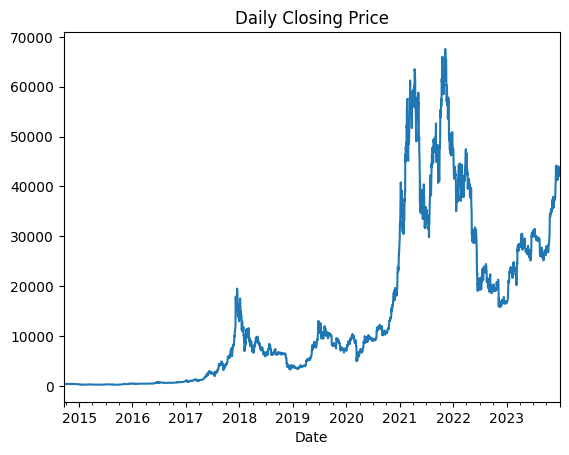

In [21]:
# Daily closing price plot
df['Close'].plot(title = "Daily Closing Price")

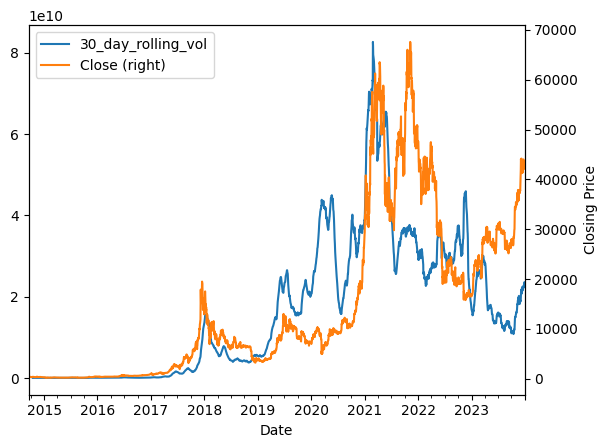

In [22]:
# Create a variable for the 30 day rolling average
df['30_day_rolling_vol'] = df['Volume'].rolling(window = 30).mean()

# Plot the Closing Price and the 30 day rolling volume
df[[ '30_day_rolling_vol']].plot(legend=True)
ax = df['Close'].plot(secondary_y=True, legend=True)
ax.set_ylabel('Closing Price')
plt.show()

In [23]:
# Perform correlation between closing price and 30 day rolling volume
print(df["30_day_rolling_vol"].corr(df["Close"]))
df[["Close","30_day_rolling_vol"]].corr()
# Pearson correlation here is not ideal for time series (90% correct). Check Spearman Correlation

0.750445379618605


,Close,30_day_rolling_vol
Close,1.000000,0.750445
30_day_rolling_vol,0.750445,1.000000


Data Manipulation

In [24]:
# Identify missing values
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
7_day_closing_avg,6
daily_return_100%,1
30_day_rolling_vol,29


In [28]:
# fill the missing values with the next observations
# day 29 is missing then use day 30 if it is not null
# bfill: backward fill of the values
# ffill: forward fill of the values
df['30_day_rolling_vol']=df["30_day_rolling_vol"].bfill()

In [29]:
# Interpolate values
df["7_day_closing_avg"]=df["7_day_closing_avg"].interpolate(method="linear"
, inplace = True)

/tmp/ipython-input-434242431.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["7_day_closing_avg"]=df["7_day_closing_avg"].interpolate(method="linear"


In [31]:
# Fetch the index
df.index.dayofweek

Index([2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       ...
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5],
      dtype='int32', name='Date', length=3392)

In [37]:
# Extract time variables
df['year']=df.index.year
df['month']=df.index.month
df['day']=df.index.day
df['day_of_week']=df.index.dayofweek
df['day_name']=df.index.day_name()
df['weekday']=df.index.day_name()
df['weekday_numeric'] = df.index.weekday

# Set a variable for weekend
df['is_weekend']=df['weekday_numeric'].isin([5,6]).astype(int)
df.head()

,Open,High,Low,Close,Adj Close,Volume,7_day_closing_avg,daily_return_100%,30_day_rolling_vol,year,month,day,day_of_week,day_name,weekday,weekday_numeric,is_weekend
Date,,,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,None,NaN,None,2014,9,17,2,Wednesday,Wednesday,2,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,None,-7.192558,None,2014,9,18,3,Thursday,Thursday,3,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,None,-6.984265,None,2014,9,19,4,Friday,Friday,4,0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,None,3.573492,None,2014,9,20,5,Saturday,Saturday,5,1
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,None,-2.465854,None,2014,9,21,6,Sunday,Sunday,6,1


In [40]:
# Feature engineering - lagged variables
df['lag_1']=df['Close'].shift(1)
df['lag_2']=df['Close'].shift(2)

# Seasonality

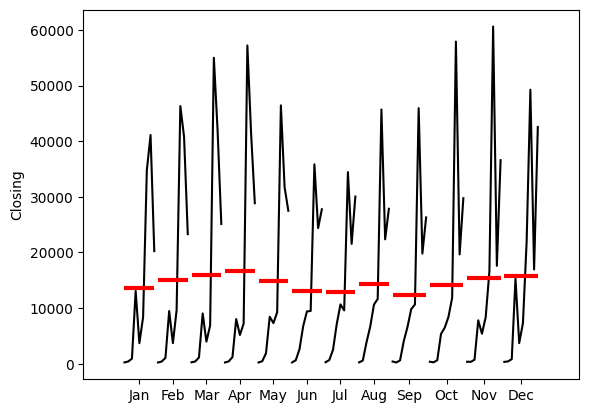

In [45]:
# Seasonal decomposation
# Monthly seasonality
month_plot(df['Close'].resample('ME').mean(), ylabel = 'Closing')
plt.show()

/tmp/ipython-input-232059361.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(df['Close'].resample('Q').mean(), ylabel = 'Closing')


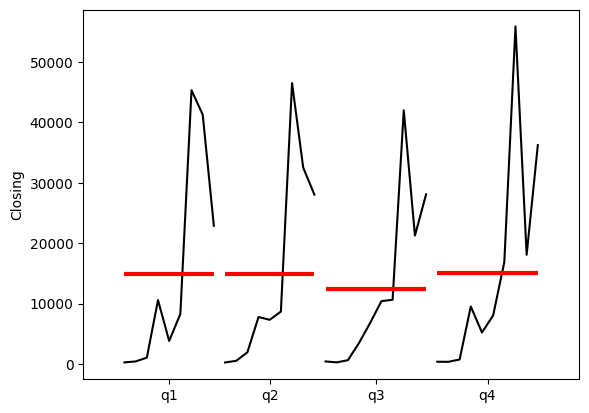

In [46]:
# Quarter plot
quarter_plot(df['Close'].resample('Q').mean(), ylabel = 'Closing')
plt.show()

In [48]:
# Import a second dataset
df_choco = pd.read_csv("/choco_monthly_revenue.csv"
, index_col="Month with Year"
, parse_dates=True)

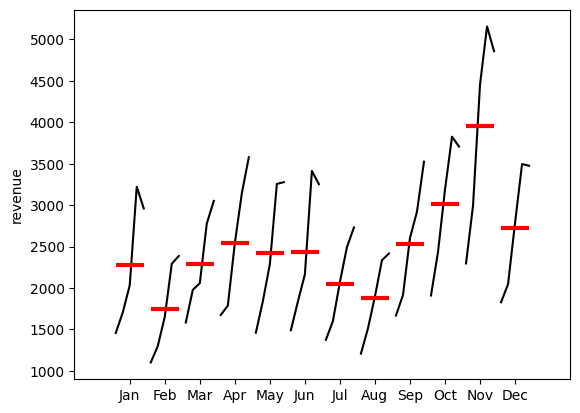

In [50]:
# plot the month_plot for df_choco
month_plot(df_choco['revenue']
           , ylabel = 'revenue')
plt.show()

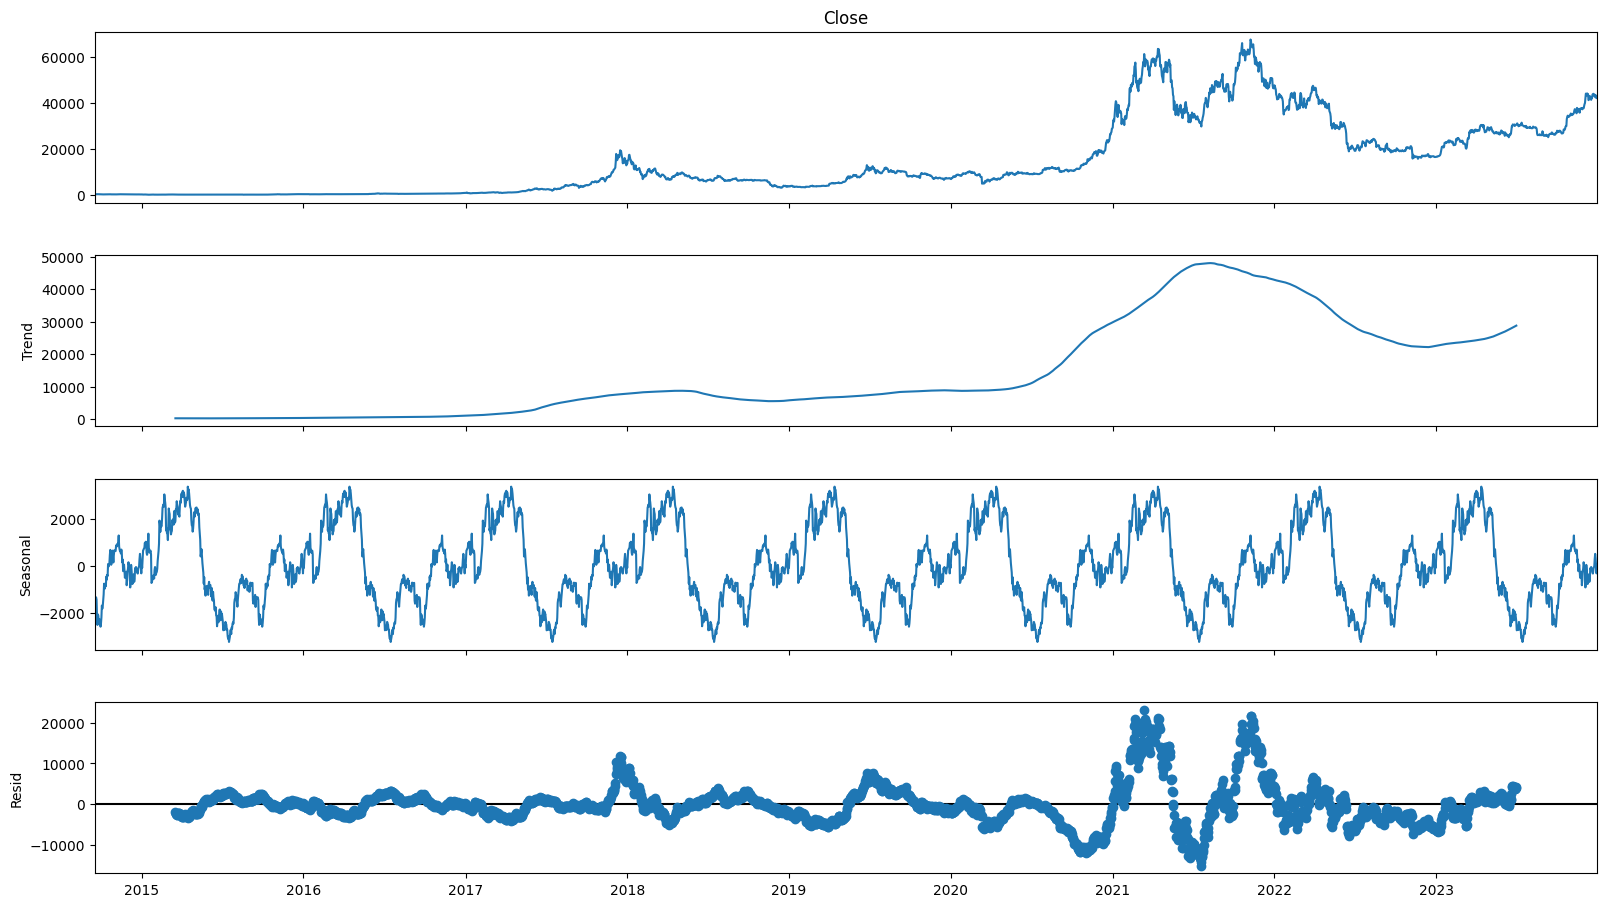

In [58]:
# seasonal decomposition for df['Close']
decomposition = seasonal_decompose(df['Close']
                                   , model = 'additive'
                                   , period = 365)
fig=decomposition.plot()
fig.set_size_inches(18,10)
plt.show()

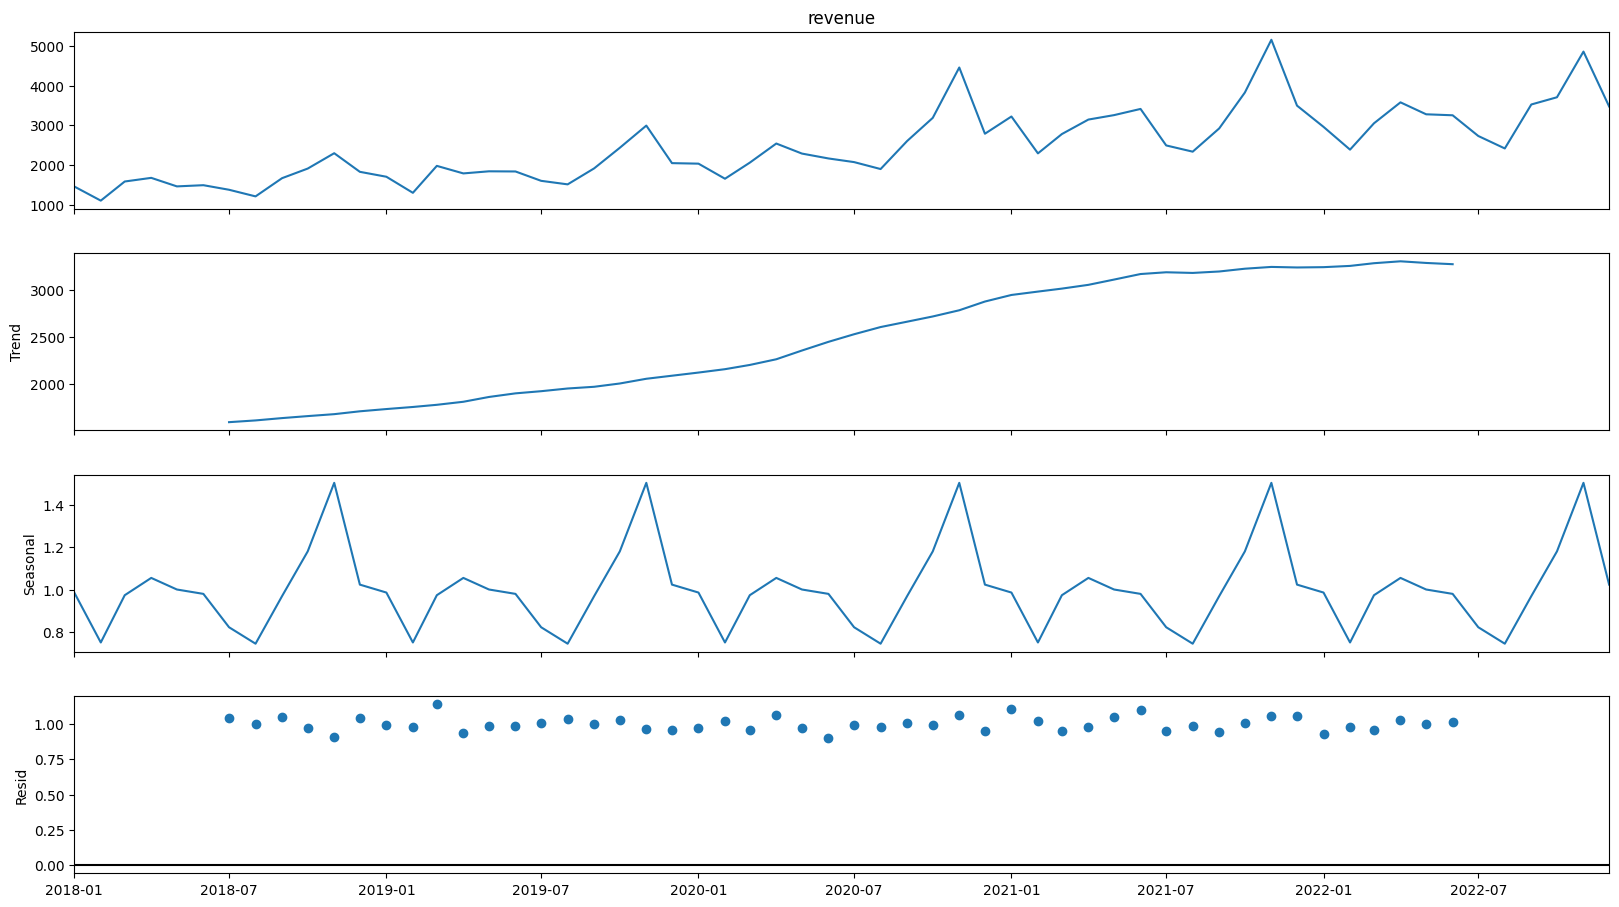

In [62]:
decomposition = seasonal_decompose(df_choco['revenue']
                                   , model = 'multiplicity'
                                   ,period = 12)
fig=decomposition.plot()
fig.set_size_inches(18,10)
plt.show()

# Auto-correlation

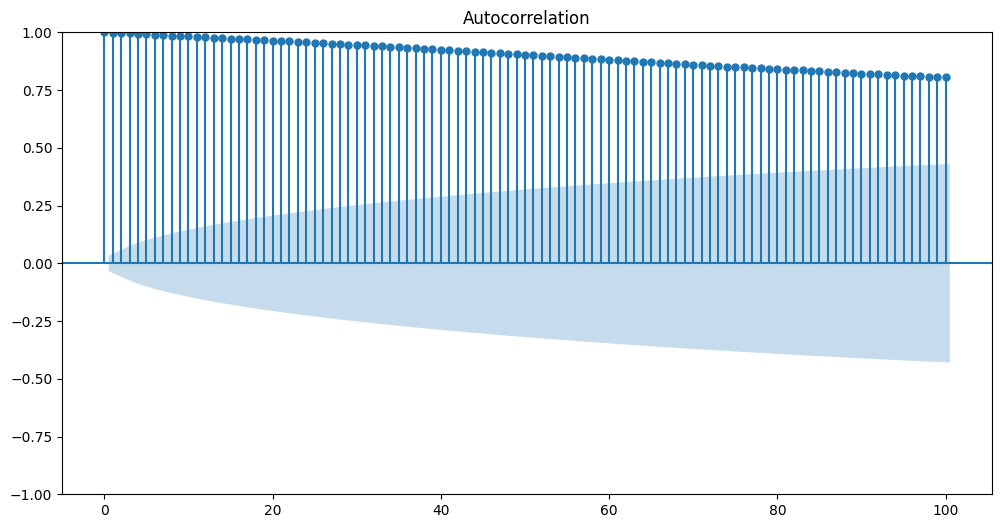

In [64]:
# Plot the ACF - autocorelation of the bitcoin adjusted close
fig, ax = plt.subplots(figsize = (12, 6))
plot_acf(df['Adj Close'], lags = 100, ax = ax)
plt.show()

In [67]:
# Preview the info of df_choco
df_choco.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2018-01-01 to 2022-12-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   revenue  60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


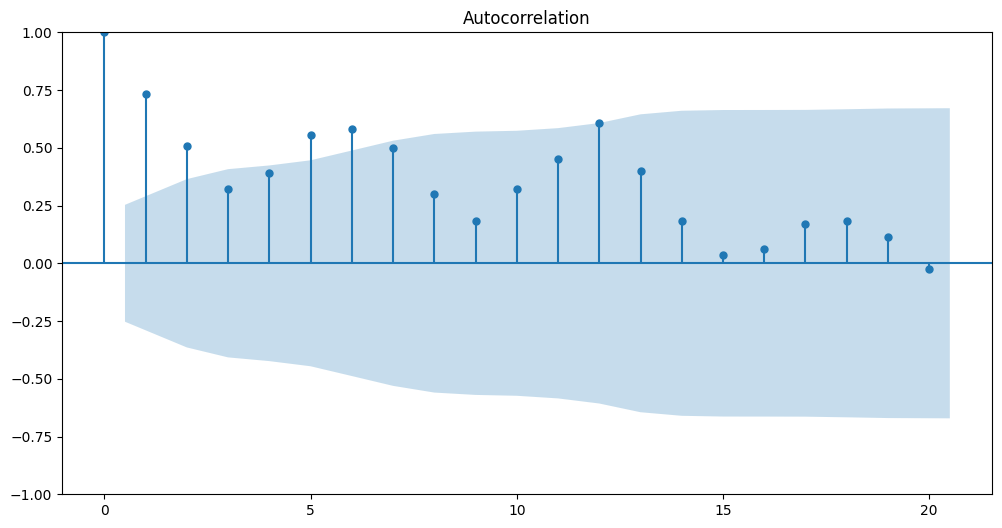

In [68]:
# Plot the ACF of the revenue kpi in df_choco (blue area is the confidence interval)
fig, ax = plt.subplots(figsize = (12, 6))
plot_acf(df_choco['revenue'], lags = 20, ax = ax)
plt.show()
# this chart shows seasonality

# Partial Auto-Correlation

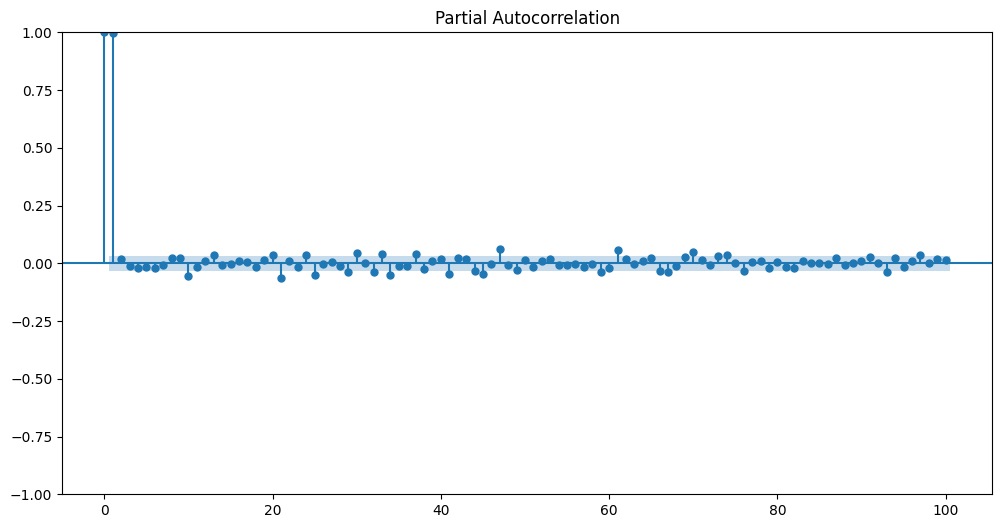

In [69]:

# PACF for bitcion adj close  (the higher the bar, the more relevance)
fig, ax = plt.subplots(figsize = (12, 6))
plot_pacf(df['Adj Close'], lags = 100, ax = ax)
plt.show()

The only relevant information nfor the prioce of itcoin is what happened the day before

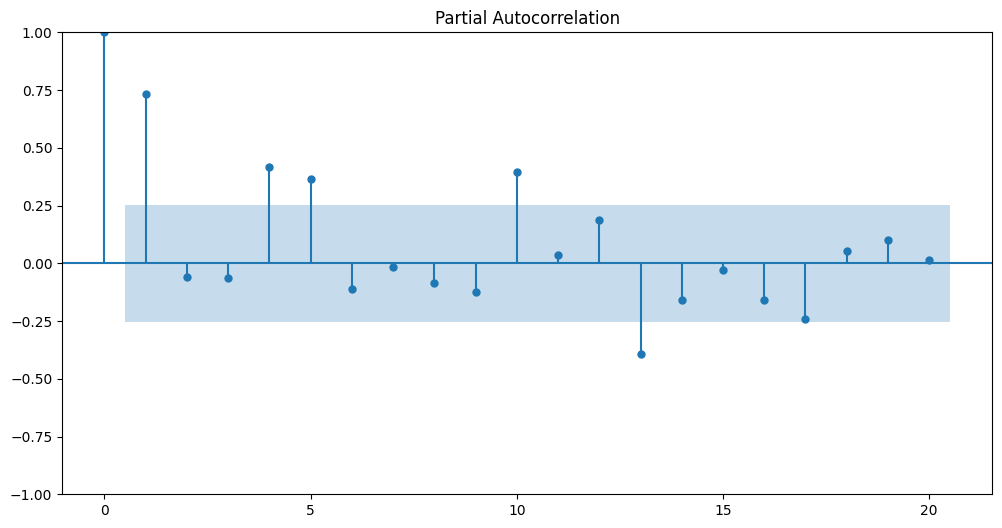

In [71]:
# PACF for the revenue for dt_choco
fig, ax = plt.subplots(figsize = (12, 6))
plot_pacf(df_choco['revenue'], lags = 20, ax = ax)
plt.show()